The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 5880 customers. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

# Import libraries

In [2]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics

#Import Dataset

In [3]:
df = pd.read_csv('customer_churn_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


# Evaluate Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


# Check Target Variable Distribution

In [6]:
df['Churn'].value_counts()

,count
Churn,
No,2982
Yes,2898


# Check is there any Null value

In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Transforming Tenure into Yearly Groups

In [8]:
df_tmp = df.copy()

In [9]:
df_tmp2 = df.copy()

In [10]:
print(df_tmp2['tenure'].max())

72


In [11]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_tmp2['tenure_group'] = pd.cut(df_tmp2.tenure, range(1, 80, 12), right=False, labels=labels)

In [12]:
df_tmp2['tenure_group'].value_counts().sort_index()

,count
tenure_group,
1 - 12,982
13 - 24,1019
25 - 36,928
37 - 48,957
49 - 60,996
61 - 72,998


# Label Encode Binary data

In [13]:
df_tmp.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
encoders = {}

le_count = 0
for col in df_tmp.columns[1:]:
    if df_tmp[col].dtype == 'object':
        if len(list(df_tmp[col].unique())) <= 2:
            print(col)
            le = LabelEncoder()
            le.fit(df_tmp[col])
            df_tmp[col] = le.transform(df_tmp[col])
            encoders[col] = le
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded.


In [15]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [16]:
df_tmp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,1,0,0,1,23,0,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer,49.85,1146.55,0
1,CUST0001,0,0,1,0,43,0,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,0,Mailed check,100.70,4330.10,1
2,CUST0002,1,1,0,0,51,1,No,DSL,No,...,Yes,Yes,No,No,One year,0,Electronic check,97.33,4963.83,1
3,CUST0003,1,1,0,0,72,1,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,0,Credit card,101.38,7299.36,0
4,CUST0004,1,1,0,0,25,1,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,0,Electronic check,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,1,0,1,1,71,1,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,1,Mailed check,74.21,5268.91,0
5876,CUST5876,1,0,0,0,22,1,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,0,Mailed check,65.43,1439.46,1
5877,CUST5877,0,0,0,0,68,0,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,1,Bank transfer,59.78,4065.04,0
5878,CUST5878,0,0,1,1,14,0,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,1,Mailed check,91.88,1286.32,0


# Exploratory Data Analysis (EDA)

## Plot Histogram of numeric Columns

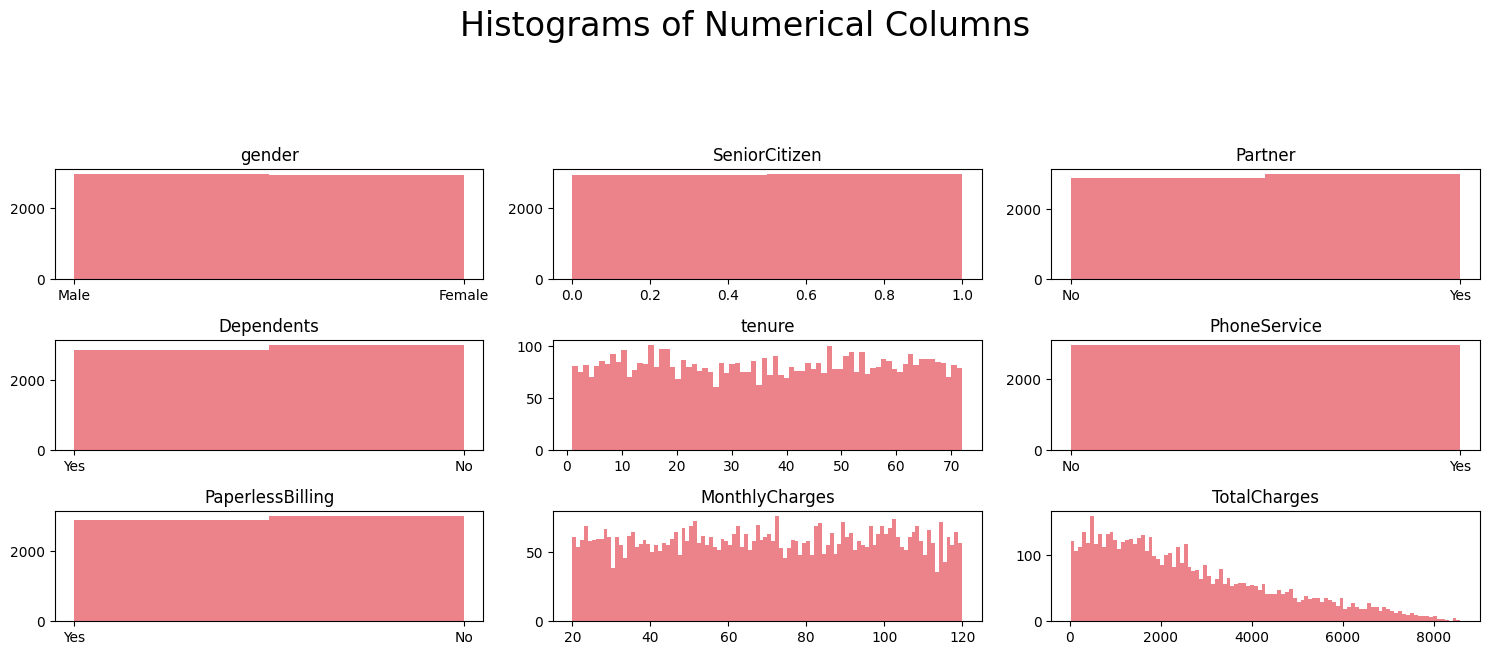

In [18]:
df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment = "center", fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(df2.iloc[:, i], bins=vals, color = '#ec838a')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Analyze distribution of Key Categorical Variables

Distribution of Contract Type

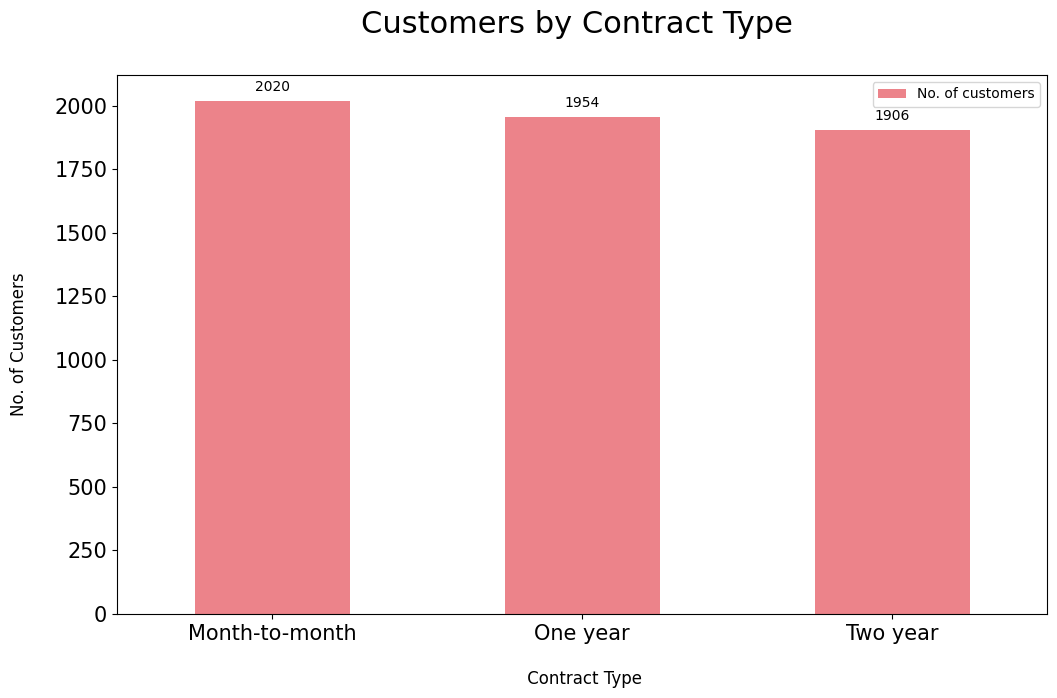

In [19]:
contract_split = df[["customerID", "Contract"]]
sectors = contract_split.groupby("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID': 'No. of customers'}, inplace=True)

ax = contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False, subplots = False, figsize = (12, 7), color = '#ec838a', fontsize = 15, stacked = False)

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

Distribution of Payment Method Type

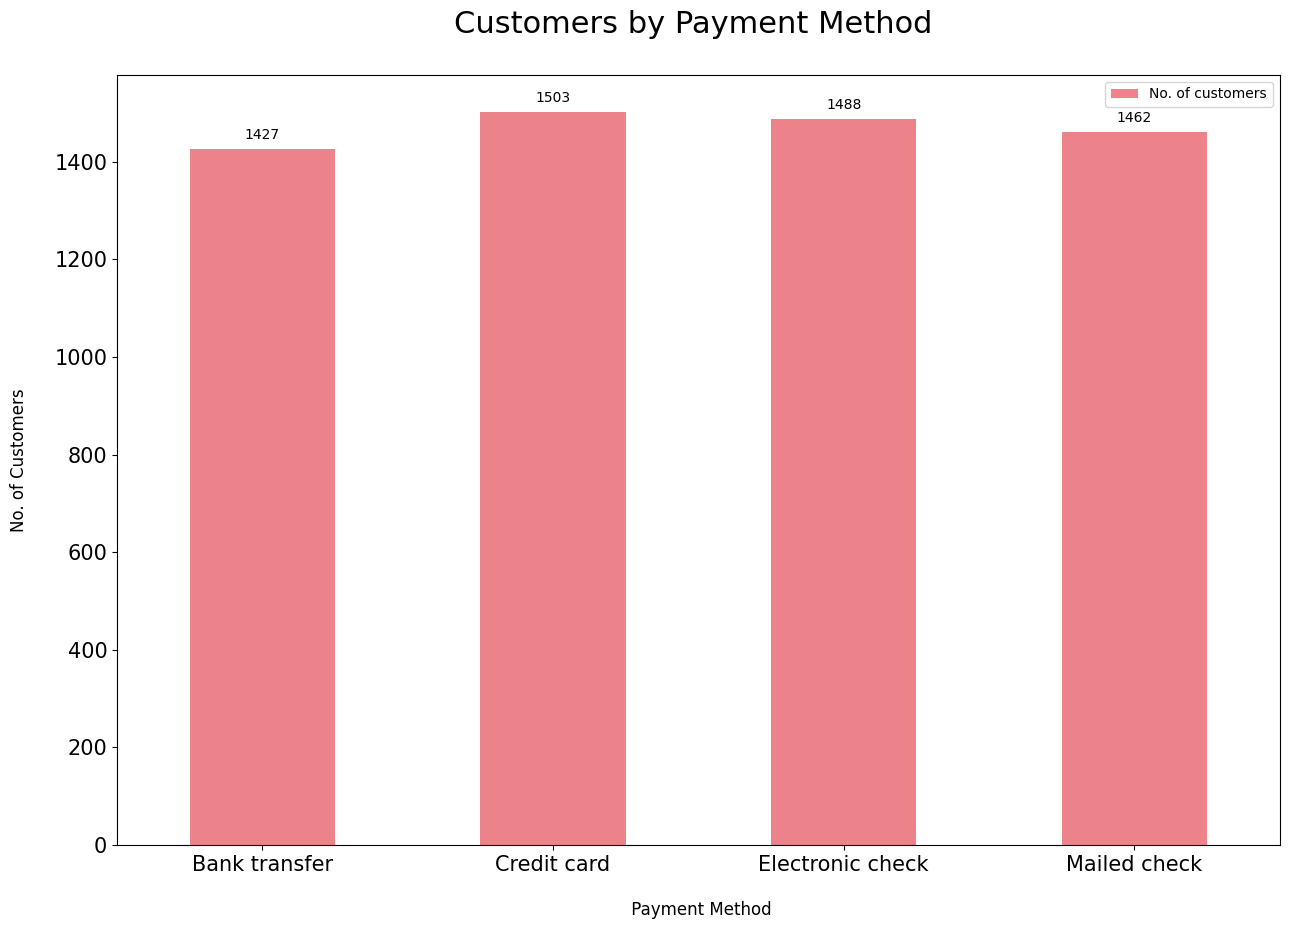

In [20]:
payment_method_split = df[["customerID", "PaymentMethod"]]
sectors = payment_method_split.groupby("PaymentMethod")
payment_method_split = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  payment_method_split[["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False, figsize =(15, 10), color = '#ec838a', fontsize = 15, stacked = False)

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")

x_labels = np.array(payment_method_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

Distribution of various Label Encoded Categorical Variables

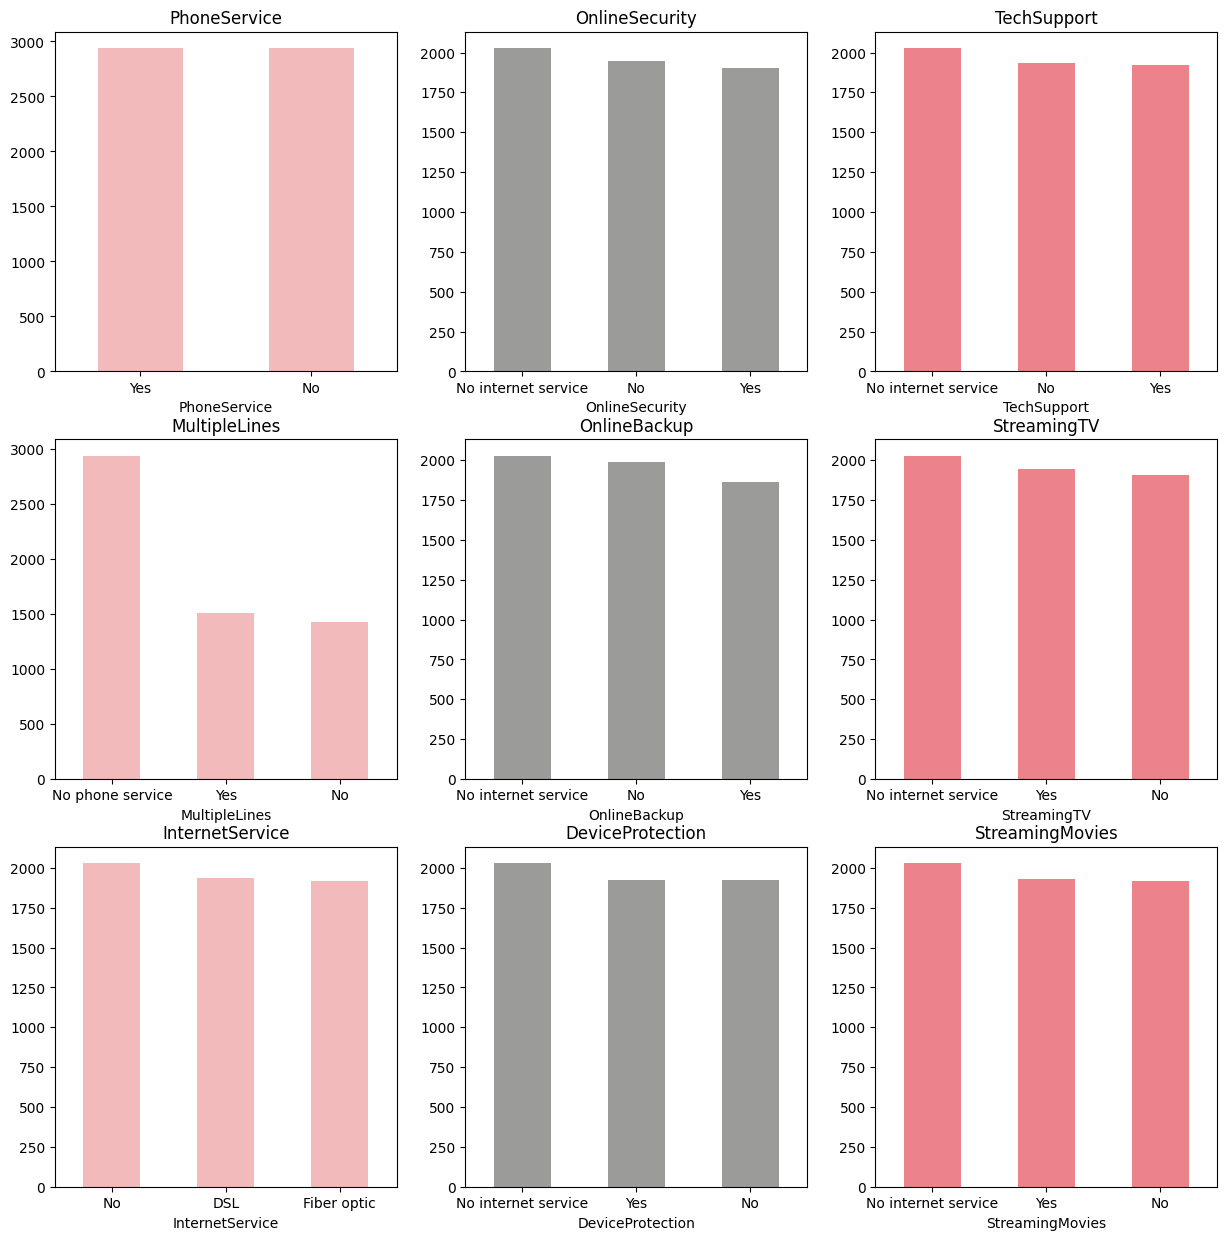

In [21]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')

    ax.set_title(item)

## Analyze Churn Rate by Categorical variables

Overall Churn Rate

<ipython-input-22-df3d17f2001a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


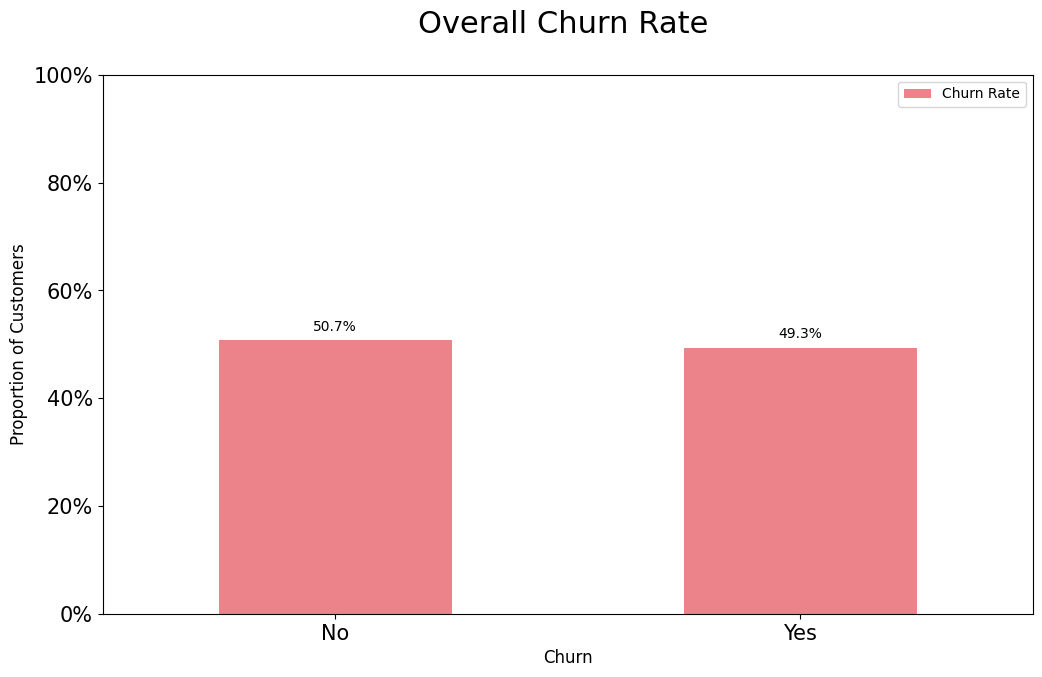

In [22]:
churn_rate = df_tmp[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize = (12, 7), color = '#ec838a', fontsize = 15, stacked = False, ylim = (0,100))

plt.ylabel('Proportion of Customers', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

Churn Rate by Contract type

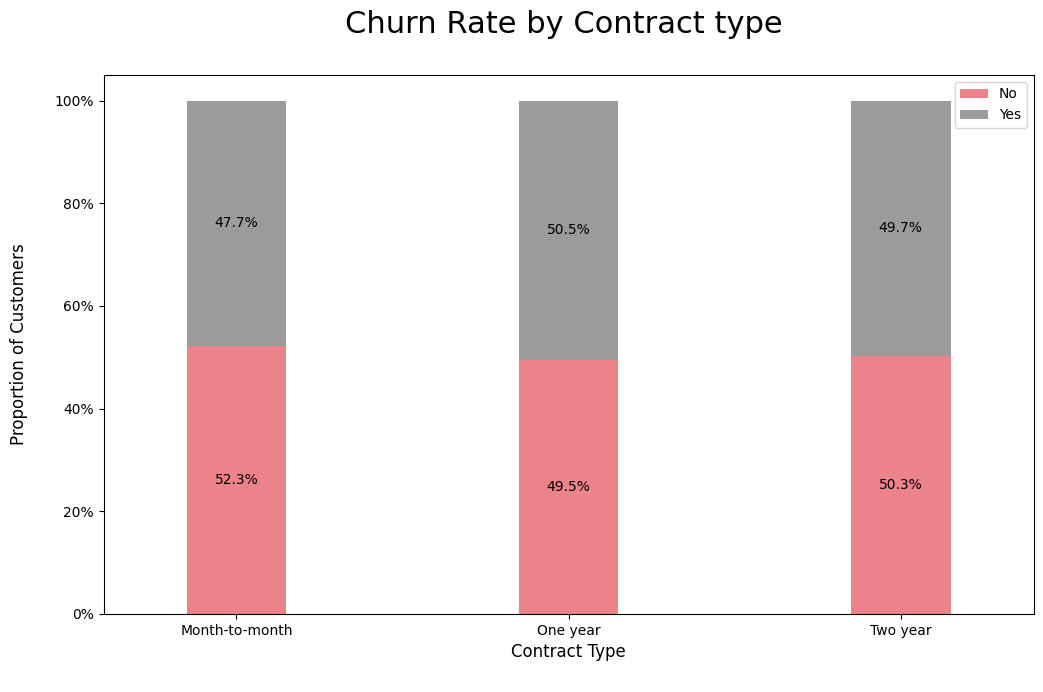

In [23]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

Churn Rate by Payment Method

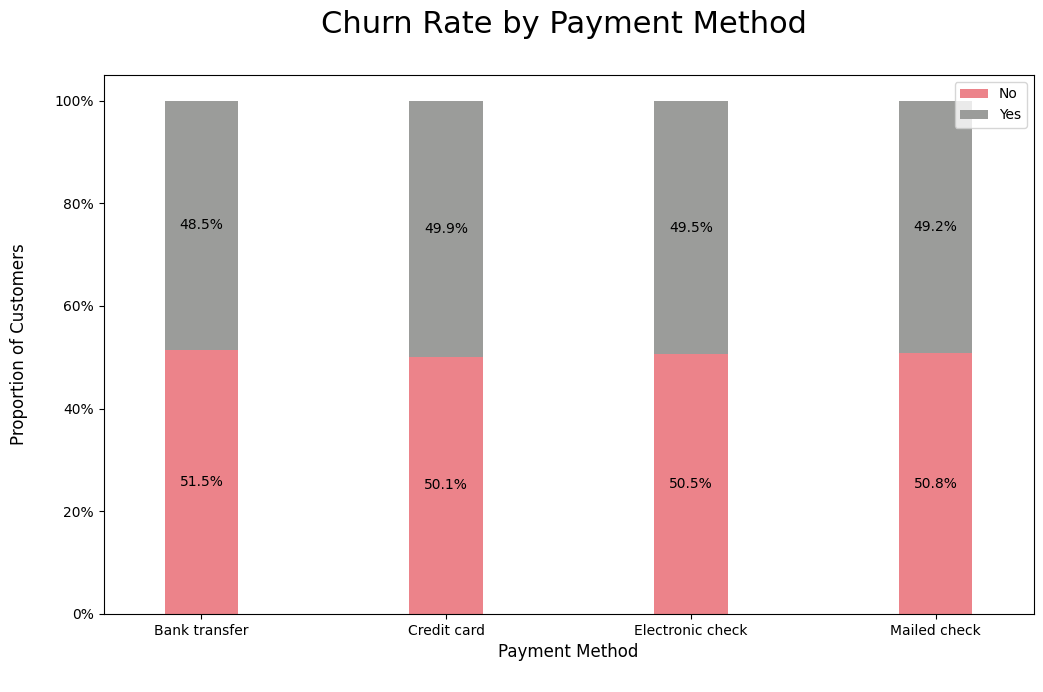

In [24]:
contract_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Payment Method\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

# One-Hot Encoding for Remaining Categorical Variabels

In [25]:
df_tmp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,1,0,0,1,23,0,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer,49.85,1146.55,0
1,CUST0001,0,0,1,0,43,0,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,0,Mailed check,100.70,4330.10,1
2,CUST0002,1,1,0,0,51,1,No,DSL,No,...,Yes,Yes,No,No,One year,0,Electronic check,97.33,4963.83,1
3,CUST0003,1,1,0,0,72,1,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,0,Credit card,101.38,7299.36,0
4,CUST0004,1,1,0,0,25,1,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,0,Electronic check,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,1,0,1,1,71,1,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,1,Mailed check,74.21,5268.91,0
5876,CUST5876,1,0,0,0,22,1,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,0,Mailed check,65.43,1439.46,1
5877,CUST5877,0,0,0,0,68,0,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,1,Bank transfer,59.78,4065.04,0
5878,CUST5878,0,0,1,1,14,0,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,1,Mailed check,91.88,1286.32,0


In [26]:
identity = df_tmp["customerID"]

df_tmp = df_tmp.drop(columns="customerID")

In [27]:
df_tmp = pd.get_dummies(df_tmp, dtype="int")
df_tmp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,23,0,1,49.85,1146.55,0,...,0,1,0,1,0,0,1,0,0,0
1,0,0,1,0,43,0,0,100.70,4330.10,1,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,51,1,0,97.33,4963.83,1,...,1,0,0,0,1,0,0,0,1,0
3,1,1,0,0,72,1,0,101.38,7299.36,0,...,1,0,0,1,0,0,0,1,0,0
4,1,1,0,0,25,1,0,52.22,1305.50,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1,0,1,1,71,1,1,74.21,5268.91,0,...,1,0,0,1,0,0,0,0,0,1
5876,1,0,0,0,22,1,0,65.43,1439.46,1,...,0,0,1,0,1,0,0,0,0,1
5877,0,0,0,0,68,0,1,59.78,4065.04,0,...,1,0,0,0,1,0,1,0,0,0
5878,0,0,1,1,14,0,1,91.88,1286.32,0,...,0,0,1,1,0,0,0,0,0,1


Save the one-hot encoding result column for later use

In [28]:
one_hot_columns = df_tmp.columns

In [29]:
df_tmp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,23,0,1,49.85,1146.55,0,...,0,1,0,1,0,0,1,0,0,0
1,0,0,1,0,43,0,0,100.70,4330.10,1,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,51,1,0,97.33,4963.83,1,...,1,0,0,0,1,0,0,0,1,0
3,1,1,0,0,72,1,0,101.38,7299.36,0,...,1,0,0,1,0,0,0,1,0,0
4,1,1,0,0,25,1,0,52.22,1305.50,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1,0,1,1,71,1,1,74.21,5268.91,0,...,1,0,0,1,0,0,0,0,0,1
5876,1,0,0,0,22,1,0,65.43,1439.46,1,...,0,0,1,0,1,0,0,0,0,1
5877,0,0,0,0,68,0,1,59.78,4065.04,0,...,1,0,0,0,1,0,1,0,0,0
5878,0,0,1,1,14,0,1,91.88,1286.32,0,...,0,0,1,1,0,0,0,0,0,1


# Heatmap

<Axes: >

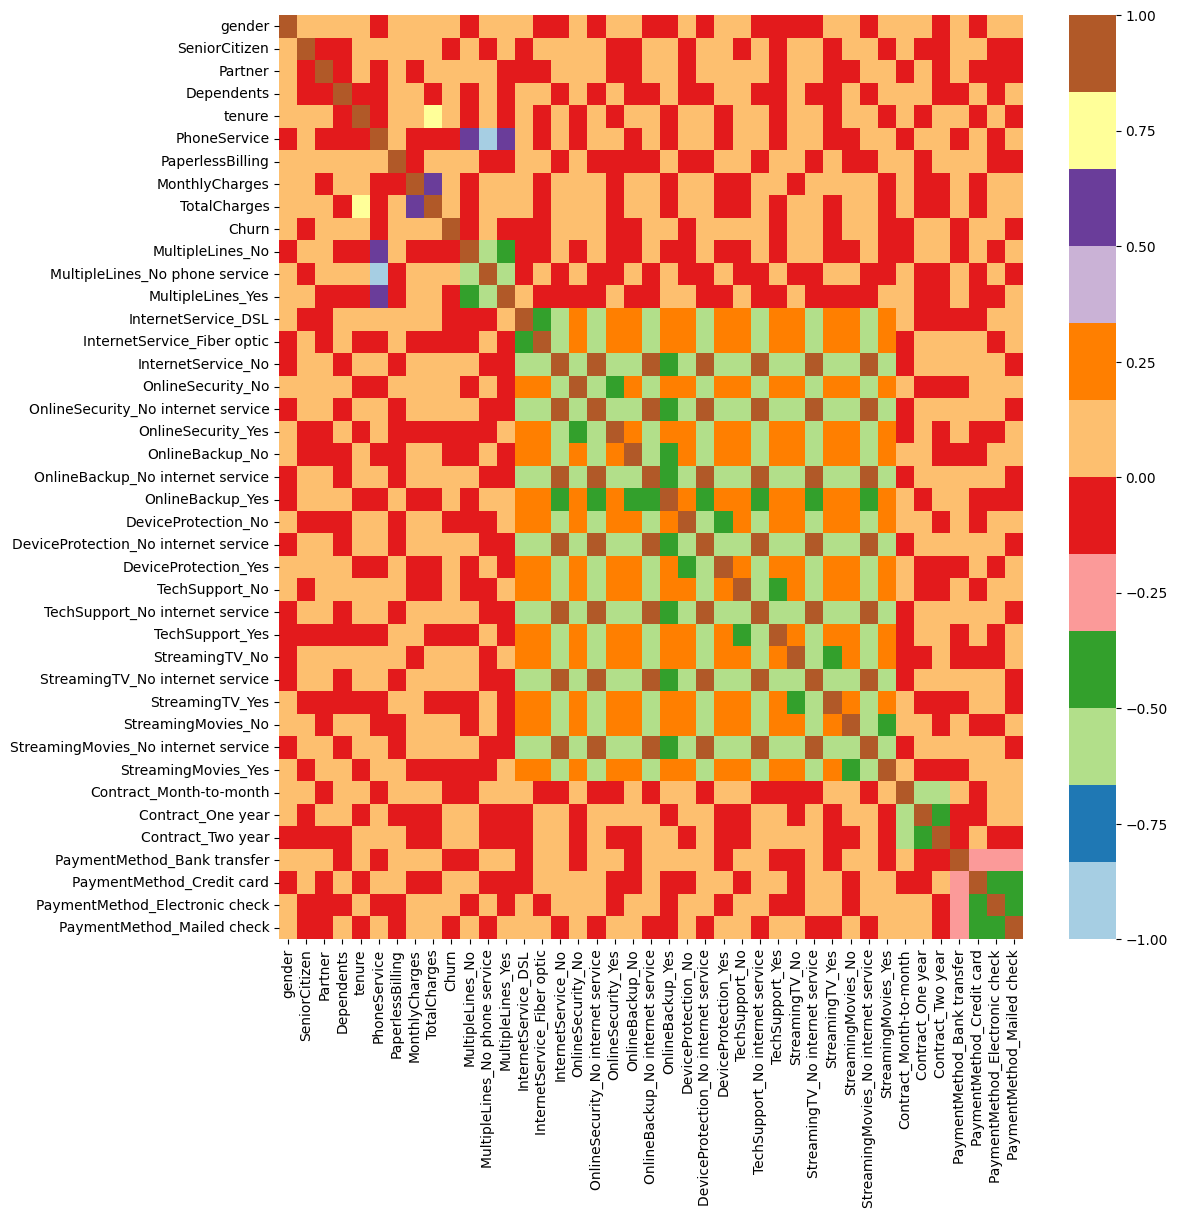

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df_tmp.corr(), cmap="Paired")

# Split Dataset into Dependent (Target) and Independent Variables (Features/Predictors)

Identify target variable

In [31]:
target = df_tmp["Churn"]
df_tmp = df_tmp.drop(columns="Churn")

# Generate training and test datasets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    stratify = target, #ensures the class distribution in the target variable remains balanced
                                                    test_size = 0.2,
                                                    random_state = 0)

In [33]:
print("Dimension of X_train dataset:", X_train.shape)
print("Dimension of y_train dataset:", y_train.shape)
print("Dimension of X_test dataset:", X_test.shape)
print("Dimension of y_test dataset:", y_test.shape)

Dimension of X_train dataset: (4704, 40)
Dimension of y_train dataset: (4704,)
Dimension of X_test dataset: (1176, 40)
Dimension of y_test dataset: (1176,)


In [34]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
3911,0,1,1,1,53,0,0,25.73,1363.69,0,...,0,0,1,0,1,0,0,1,0,0
3927,1,1,0,1,16,1,0,102.93,1646.88,1,...,0,0,1,1,0,0,1,0,0,0
798,1,1,0,1,5,1,1,68.35,341.75,0,...,1,0,0,0,0,1,0,0,1,0
3045,1,1,0,1,68,1,0,86.20,5861.60,0,...,1,0,0,0,0,1,0,0,1,0
3850,0,1,1,1,1,1,1,62.58,62.58,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1,1,0,0,43,1,0,104.72,4502.96,0,...,0,1,0,1,0,0,0,0,0,1
1575,1,0,0,0,18,1,1,89.90,1618.20,1,...,1,0,0,0,0,1,1,0,0,0
2189,1,0,0,0,7,0,0,23.22,162.54,0,...,1,0,0,0,1,0,0,0,1,0
2691,1,1,1,1,21,1,1,40.65,853.65,0,...,1,0,0,0,0,1,0,1,0,0


# Feature Scaling

In [35]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4704 entries, 3911 to 3866
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                4704 non-null   float64
 1   SeniorCitizen                         4704 non-null   float64
 2   Partner                               4704 non-null   float64
 3   Dependents                            4704 non-null   float64
 4   tenure                                4704 non-null   float64
 5   PhoneService                          4704 non-null   float64
 6   PaperlessBilling                      4704 non-null   float64
 7   MonthlyCharges                        4704 non-null   float64
 8   TotalCharges                          4704 non-null   float64
 9   MultipleLines_No                      4704 non-null   float64
 10  MultipleLines_No phone service        4704 non-null   float64
 11  MultipleLines_Yes  

In [37]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
3911,-0.997876,0.994488,0.982299,1.020621,0.785977,-1.002554,-0.984809,-1.562368,-0.637351,-0.562292,...,-0.698331,-0.720680,1.423737,-0.723747,1.417603,-0.692275,-0.567531,1.707845,-0.583569,-0.572768
3927,1.002128,0.994488,-1.018019,1.020621,-0.986519,0.997452,-0.984809,1.130630,-0.489128,1.778435,...,-0.698331,-0.720680,1.423737,1.381699,-0.705416,-0.692275,1.762019,-0.585533,-0.583569,-0.572768
798,1.002128,0.994488,-1.018019,1.020621,-1.513477,0.997452,1.015425,-0.075638,-1.172238,-0.562292,...,1.431986,-0.720680,-0.702377,-0.723747,-0.705416,1.444512,-0.567531,-0.585533,1.713593,-0.572768
3045,1.002128,0.994488,-1.018019,1.020621,1.504556,0.997452,-0.984809,0.547031,1.716869,-0.562292,...,1.431986,-0.720680,-0.702377,-0.723747,-0.705416,1.444512,-0.567531,-0.585533,1.713593,-0.572768
3850,-0.997876,0.994488,0.982299,1.020621,-1.705098,0.997452,1.015425,-0.276915,-1.318356,-0.562292,...,-0.698331,1.387578,-0.702377,-0.723747,-0.705416,1.444512,-0.567531,-0.585533,1.713593,-0.572768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1.002128,0.994488,-1.018019,-0.979796,0.306924,0.997452,-0.984809,1.193072,1.005753,-0.562292,...,-0.698331,1.387578,-0.702377,1.381699,-0.705416,-0.692275,-0.567531,-0.585533,-0.583569,1.745907
1575,1.002128,-1.005543,-1.018019,-0.979796,-0.890708,0.997452,1.015425,0.676100,-0.504140,1.778435,...,1.431986,-0.720680,-0.702377,-0.723747,-0.705416,1.444512,1.762019,-0.585533,-0.583569,-0.572768
2189,1.002128,-1.005543,-1.018019,-0.979796,-1.417667,-1.002554,-0.984809,-1.649926,-1.266037,-0.562292,...,1.431986,-0.720680,-0.702377,-0.723747,1.417603,-0.692275,-0.567531,-0.585533,1.713593,-0.572768
2691,1.002128,0.994488,0.982299,1.020621,-0.746993,0.997452,1.015425,-1.041908,-0.904308,-0.562292,...,1.431986,-0.720680,-0.702377,-0.723747,-0.705416,1.444512,-0.567531,1.707845,-0.583569,-0.572768


In [38]:
df_tmp.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,...,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.501701,0.500680,0.509354,0.489116,36.549150,0.500170,0.491497,70.157779,2566.813165,0.243027,...,0.326531,0.345068,0.328401,0.343537,0.332313,0.324150,0.242687,0.255612,0.253061,0.248639
std,0.500040,0.500042,0.499955,0.499924,20.909674,0.500042,0.499970,28.804615,1910.017743,0.428948,...,0.468984,0.475431,0.469672,0.474929,0.471083,0.468096,0.428744,0.436242,0.434803,0.432261
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,45.717500,1020.217500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,37.000000,1.000000,0.000000,70.155000,2136.445000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,95.457500,3767.665000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,119.990000,8589.600000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4704.000000,4.704000e+03,4.704000e+03,...,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03,4.704000e+03
mean,2.114711e-17,-5.249014e-17,6.910572e-17,-6.042030e-18,-3.021015e-18,-8.458842e-17,2.567863e-17,0.000000,5.588878e-17,-2.869964e-17,...,-9.516197e-17,-1.812609e-17,3.323117e-17,6.042030e-18,9.667248e-17,2.114711e-17,-1.737084e-17,2.567863e-17,-6.948335e-17,-7.628063e-17
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106,1.000106e+00,1.000106e+00,...,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-9.978764e-01,-1.005543e+00,-1.018019e+00,-9.797959e-01,-1.705098e+00,-1.002554e+00,-9.848092e-01,-1.762250,-1.340627e+00,-5.622921e-01,...,-6.983309e-01,-7.206801e-01,-7.023769e-01,-7.237469e-01,-7.054163e-01,-6.922754e-01,-5.675307e-01,-5.855331e-01,-5.835691e-01,-5.727681e-01
25%,-9.978764e-01,-1.005543e+00,-1.018019e+00,-9.797959e-01,-8.907085e-01,-1.002554e+00,-9.848092e-01,-0.847346,-8.102847e-01,-5.622921e-01,...,-6.983309e-01,-7.206801e-01,-7.023769e-01,-7.237469e-01,-7.054163e-01,-6.922754e-01,-5.675307e-01,-5.855331e-01,-5.835691e-01,-5.727681e-01
50%,-9.978764e-01,9.944880e-01,9.822995e-01,-9.797959e-01,1.949208e-02,9.974522e-01,-9.848092e-01,0.006687,-2.197434e-01,-5.622921e-01,...,-6.983309e-01,-7.206801e-01,-7.023769e-01,-7.237469e-01,-7.054163e-01,-6.922754e-01,-5.675307e-01,-5.855331e-01,-5.835691e-01,-5.727681e-01
75%,1.002128e+00,9.944880e-01,9.822995e-01,1.020621e+00,8.817874e-01,9.974522e-01,1.015425e+00,0.876766,6.222605e-01,-5.622921e-01,...,1.431986e+00,1.387578e+00,1.423737e+00,1.381699e+00,1.417603e+00,1.444512e+00,-5.675307e-01,1.707845e+00,1.713593e+00,-5.727681e-01
max,1.002128e+00,9.944880e-01,9.822995e-01,1.020621e+00,1.696177e+00,9.974522e-01,1.015425e+00,1.725741,3.144713e+00,1.778435e+00,...,1.431986e+00,1.387578e+00,1.423737e+00,1.381699e+00,1.417603e+00,1.444512e+00,1.762019e+00,1.707845e+00,1.713593e+00,1.745907e+00


# Model Selection

In [40]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

In [41]:
# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# Set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # Accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # ROC_AUC scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,49.63,2.17,49.53,1.66
1,Decision Tree Classifier,48.60,1.95,48.55,1.88
0,Logistic Regression,47.94,2.04,48.60,1.81


Compare Baseline Classification Algorithms - Second Iteration

In [42]:
# Logistic Regression
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

# Decision Tree
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)

# Random Forest
# Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = pd.concat([results,model_results], ignore_index = True)

In [43]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
1        Decision Tree  0.508503   0.501730  0.500000  0.500864  0.500345   
2        Random Forest  0.495748   0.487427  0.434483  0.459435  0.444131   
0  Logistic Regression  0.496599   0.487234  0.394828  0.436190  0.410394   

    ROC-AUC  
1  0.508389  
2  0.494926  
0  0.495233  


# Train and Test the Chosen Model

In [44]:
# Fit Logistic Regression on the Training dataset:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

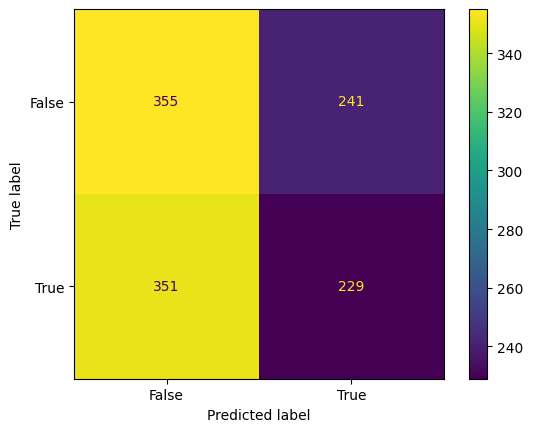

In [45]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [46]:
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  Logistic Regression  0.496599   0.487234  0.394828   0.43619  0.410394   

   ROC AUC   
0  0.495233  


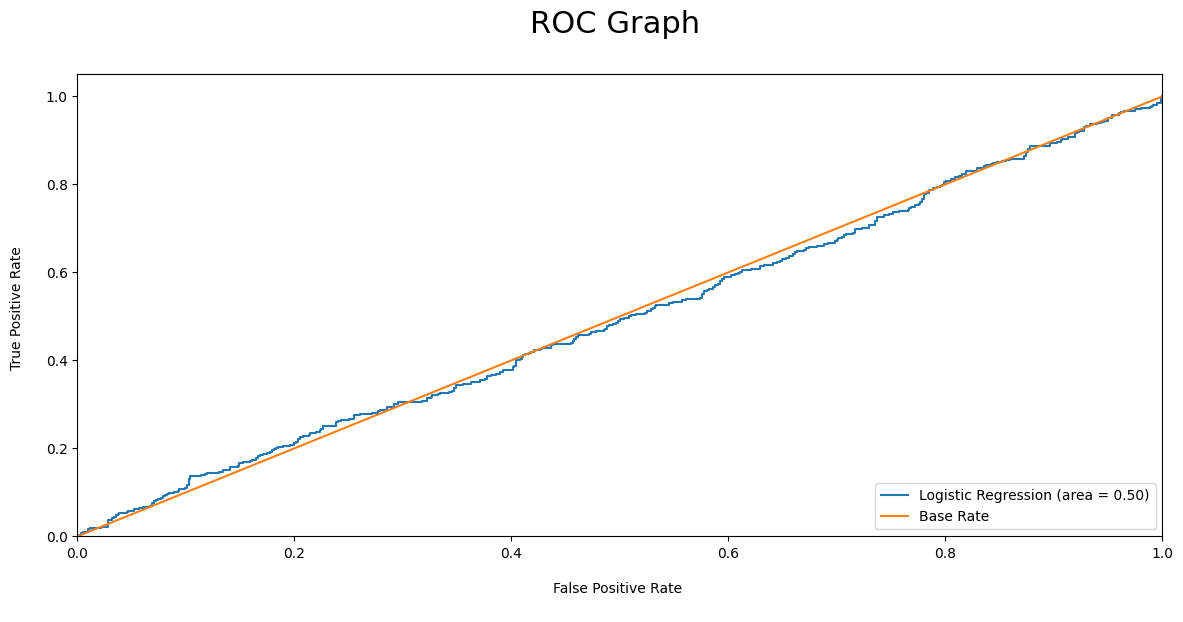

In [47]:
# Evaluate the model using ROC Graph
classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

# Try predicting new data

With the Logistic Regression model that we have obtained above, give an example of applying the model to predict a new row of customer data. Given a value for each of the original variables, use the model to predict whether the customer will unsubscribe or not.

In [48]:
new_data = {'customerID': ['7370-BOUSA'],
            'gender': ['Female'],
            'SeniorCitizen': [1],
            'Partner': ['Yes'],
            'Dependents': ['Yes'],
            'tenure': [15],
            'PhoneService': ['No'],
            'MultipleLines': ['No phone service'],
            'InternetService': ['DSL'],
            'OnlineSecurity': ['No'],
            'OnlineBackup': ['Yes'],
            'DeviceProtection': ['No'],
            'TechSupport': ['Yes'],
            'StreamingTV': ['Yes'],
            'StreamingMovies': ['Yes'],
            'Contract': ['Month-to-month'],
            'PaperlessBilling': ['Yes'],
            'PaymentMethod': ['Bank transfer'],
            'MonthlyCharges': [40.75],
            'TotalCharges': [611.25]
            }

In [49]:
new_df = pd.DataFrame(new_data)
new_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7370-BOUSA,Female,1,Yes,Yes,15,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer,40.75,611.25


In [50]:
new_data_tf = new_data.copy()

## Label Encode Binary Data

In [51]:
new_data_tf['gender'] = encoders['gender'].transform(new_df['gender'])[0]
new_data_tf['Partner'] = encoders['Partner'].transform(new_df['Partner'])[0]
new_data_tf['Dependents'] = encoders['Dependents'].transform(new_df['Dependents'])[0]
new_data_tf['PhoneService'] = encoders['PhoneService'].transform(new_df['PhoneService'])[0]
new_data_tf['PaperlessBilling'] = encoders['PaperlessBilling'].transform(new_df['PaperlessBilling'])[0]

In [52]:
data_tmp = pd.DataFrame(new_data_tf)
data_tmp

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7370-BOUSA,0,1,1,1,15,0,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,1,Bank transfer,40.75,611.25


In [53]:
data_tmp = data_tmp.drop(columns=["customerID"])

## One-Hot Encoding for Remaining Categorical Variabels

In [54]:
final_data = pd.get_dummies(data_tmp)
final_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,PaymentMethod_Bank transfer
0,0,1,1,1,15,0,1,40.75,611.25,True,True,True,True,True,True,True,True,True,True


In [55]:
for column in one_hot_columns:
    if column not in final_data.columns:
        final_data[column] = 0

In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                1 non-null      int64  
 1   SeniorCitizen                         1 non-null      int64  
 2   Partner                               1 non-null      int64  
 3   Dependents                            1 non-null      int64  
 4   tenure                                1 non-null      int64  
 5   PhoneService                          1 non-null      int64  
 6   PaperlessBilling                      1 non-null      int64  
 7   MonthlyCharges                        1 non-null      float64
 8   TotalCharges                          1 non-null      float64
 9   MultipleLines_No phone service        1 non-null      bool   
 10  InternetService_DSL                   1 non-null      bool   
 11  OnlineSecurity_No      

In [57]:
final_data = final_data.drop(columns = "Churn")

In [58]:
data_scaled = sc_X.transform(final_data.loc[0].values.reshape(1,-1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
data_scaled

array([[-0.9978764 ,  0.99448798,  0.98229949,  1.02062073, -1.03442438,
        -1.00255428,  1.01542507, -1.0384197 , -1.03118049,  1.77843523,
         1.00255428,  1.68244432,  1.42032348,  1.43544679,  1.38757815,
         1.41286176,  1.38757815,  1.44311081,  1.38889027, -0.72068013,
        -0.68087941, -0.69664721, -0.72068013, -0.70406496, -0.69967875,
        -0.72068013, -0.70102742, -0.69597409, -0.72068013, -0.70474055,
        -0.69833089, -0.72068013, -0.70237692, -0.72374686, -0.70541635,
        -0.69227544, -0.56753067, -0.58553308, -0.58356907, -0.57276805]])

## Predict

In [60]:
y = np.expm1(classifier.predict(data_scaled))
print(y)

[0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
new_df['Churn'] = y
new_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7370-BOUSA,Female,1,Yes,Yes,15,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer,40.75,611.25,0.0
